# Simle Mandelbrot Set

In [39]:
from PIL import Image
import math
from numpy import array
import colorsys

### Data and Settings

In [40]:
class ComplexNumber:
    def __init__(self, real=0, img=0):
        self.real = real
        self.img = img

    def get_distance(self):
        return math.sqrt(math.pow(self.real, 2) + math.pow(self.img, 2))

    def __add__(self, other):
        return ComplexNumber(self.real + other.real, self.img + other.img)
        
    def __sub__(self, other):
        return ComplexNumber(self.real - other.real, self.img - other.img)

    def __mul__(self, other):
        real_res = self.real * other.real - self.img * other.img
        img_res = self.real * other.img + self.img * other.real
        return ComplexNumber(real_res, img_res)

    def __le__(self, other):
        return self.get_distance() <= other.get_distance

In [41]:
Z_0 = ComplexNumber(0, 0)
WIDTH = 1024
LENGTH = int(WIDTH / 2)

### Logics
AKA math stuff

In [42]:
def rgb_conv(i):
    color = 255 * array(colorsys.hsv_to_rgb(i / 255.0, 1.0, 0.5))
    return tuple(color.astype(int))

In [43]:
def get_mandelbrot_color(c):
    z = Z_0
    is_in_set = True
    limit = 2
    iterations = 0
    for i in range(100):
        z = z * z + c  # Basic formula
        if z.get_distance() > limit:
            return rgb_conv(i)
    return (0, 0, 0)  # C is part of the Mandelbrot set and therefore is black

### Progress Bar
For mental health

In [44]:
import time, sys
from IPython.display import clear_output

def update_progress(progress):
    bar_length = 20
    if isinstance(progress, int):
        progress = float(progress)
    if not isinstance(progress, float):
        progress = 0
    if progress < 0:
        progress = 0
    if progress >= 1:
        progress = 1

    block = int(round(bar_length * progress))

    clear_output(wait = True)
    text = "Progress: [{0}] {1:.1f}%".format( "#" * block + "-" * (bar_length - block), progress * 100)
    print(text)

### Main

Progress: [####################] 99.9%


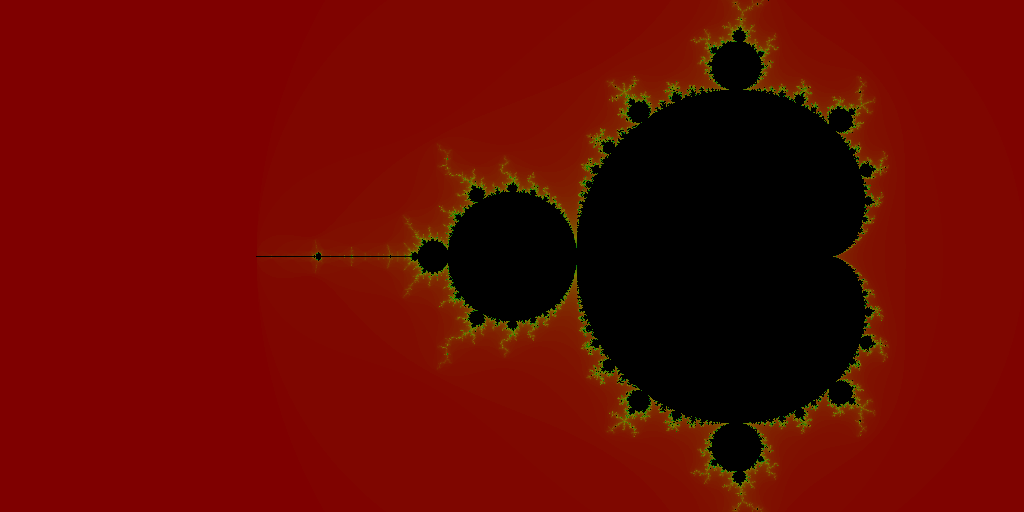

In [45]:
img = Image.new('RGB', (WIDTH, int(WIDTH / 2)))
pixels = img.load()

for x in range(WIDTH):
    update_progress(x / WIDTH)        
    for y in range(LENGTH):
        curr_complex = ComplexNumber((x - (0.75 * WIDTH)) / (WIDTH / 4),
                                     (y - (WIDTH / 4)) / (WIDTH / 4))
        pixels[x, y] = get_mandelbrot_color(curr_complex)
        
display(img)

# Zoomed In Mandelbrot Set

In [67]:
import numpy as np
import matplotlib.pyplot as plt

In [68]:
import time, sys
from IPython.display import clear_output

def update_progress(progress):
    bar_length = 20
    if isinstance(progress, int):
        progress = float(progress)
    if not isinstance(progress, float):
        progress = 0
    if progress < 0:
        progress = 0
    if progress >= 1:
        progress = 1

    block = int(round(bar_length * progress))

    clear_output(wait = True)
    text = "Progress: [{0}] {1:.1f}%".format( "#" * block + "-" * (bar_length - block), progress * 100)
    print(text)

In [69]:
Z_0 = ComplexNumber(0, 0)
threshold = 120
density = 1000

In [70]:
def get_diversion_rate(c):
    z = ComplexNumber(0, 0)
    for iteration in range(threshold):
        z = z * z + c
        if z.get_distance() > 4:
            break
            
    return iteration

In [87]:
def plot_mandelbrot(threshold, density):
    real_axis = np.linspace(-2.25, 0.75, density)
    img_axis = np.linspace(-1.5, 1.5, density)
    
    canvas = np.empty((len(real_axis), len(img_axis)))
    
    for row in range(len(real_axis)):
        update_progress(row / len(real_axis))
        for col in range(len(img_axis)):
            c = ComplexNumber(real_axis[row], img_axis[col])
            
            canvas[row, col] = get_diversion_rate(c)
            
    plt.imshow(canvas.T, interpolation="nearest")
    display(plt)

Progress: [####################] 99.9%


<module 'matplotlib.pyplot' from 'C:\\Users\\mikim\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

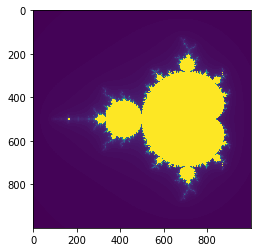

In [88]:
plot_mandelbrot(threshold, density)